In [27]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
print("First 10 rows:")
print(df.head(10))
print("\nShape of dataset:")
print(df.shape)
print("\nSummary statistics (.describe()):")
print(df.describe())
print("\nInfo about the dataset (.info()):")
print(df.info())


First 10 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timoth

In [28]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\betsy\AppData\Local\Temp\ipykernel_10840\2048102827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\betsy\AppData\Local\Temp\ipykernel_10840\2048102827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [30]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

df[['Name', 'FamilySize', 'Title']].head()


,Name,FamilySize,Title
0,"Braund, Mr. Owen Harris",2,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,Mrs
2,"Heikkinen, Miss. Laina",1,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,Mrs
4,"Allen, Mr. William Henry",1,Mr


In [31]:
df['AgeGroup'] = pd.cut(df['Age'], bins=5, labels=[1, 2, 3, 4, 5])

df[['Age', 'AgeGroup']].head(10)


,Age,AgeGroup
0,22.0,2
1,38.0,3
2,26.0,2
3,35.0,3
4,35.0,3
5,28.0,2
6,54.0,4
7,2.0,1
8,27.0,2
9,14.0,1


In [34]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print(df_encoded.columns)
df_encoded.head()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'Title', 'AgeGroup', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Title,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,Mr,2,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,Mrs,3,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,Miss,2,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,Mrs,3,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,Mr,3,True,False,True


In [33]:
columns_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']  
df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore')
print(df_final.columns)

df_final.head()


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'Title', 'AgeGroup', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Title,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,Mr,2,True,False,True
1,1,1,38.0,1,0,71.2833,2,Mrs,3,False,False,False
2,1,3,26.0,0,0,7.9250,1,Miss,2,False,False,True
3,1,1,35.0,1,0,53.1000,2,Mrs,3,False,False,True
4,0,3,35.0,0,0,8.0500,1,Mr,3,True,False,True


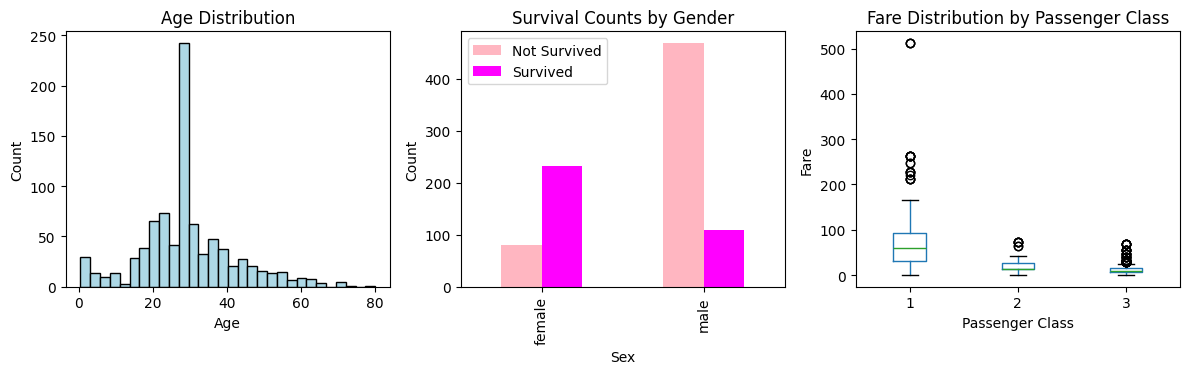

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
survival_gender = df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender.plot(kind='bar', stacked=False, ax=plt.gca(), color=['lightpink', 'magenta'])
plt.title('Survival Counts by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])

plt.subplot(1, 3, 3)
df.boxplot(column='Fare', by='Pclass', grid=False, ax=plt.gca())
plt.title('Fare Distribution by Passenger Class')
plt.suptitle('')  
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()


In [38]:
import numpy as np

fare_array = df['Fare'].to_numpy()
age_array = df['Age'].to_numpy()

fare_mean = np.mean(fare_array)
fare_median = np.median(fare_array)
fare_std = np.std(fare_array)

age_mean = np.mean(age_array)
age_median = np.median(age_array)
age_std = np.std(age_array)

print(f"Fare - Mean: {fare_mean:.2f}, Median: {fare_median:.2f}, Std Dev: {fare_std:.2f}")
print(f"Age - Mean: {age_mean:.2f}, Median: {age_median:.2f}, Std Dev: {age_std:.2f}")

def min_max_normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

fare_normalized = min_max_normalize(fare_array)
age_normalized = min_max_normalize(age_array)

df['Fare_Normalized'] = fare_normalized
df['Age_Normalized'] = age_normalized
df[['Fare', 'Fare_Normalized', 'Age', 'Age_Normalized']].head()


Fare - Mean: 32.20, Median: 14.45, Std Dev: 49.67
Age - Mean: 29.36, Median: 28.00, Std Dev: 13.01


,Fare,Fare_Normalized,Age,Age_Normalized
0,7.2500,0.014151,22.0,0.271174
1,71.2833,0.139136,38.0,0.472229
2,7.9250,0.015469,26.0,0.321438
3,53.1000,0.103644,35.0,0.434531
4,8.0500,0.015713,35.0,0.434531


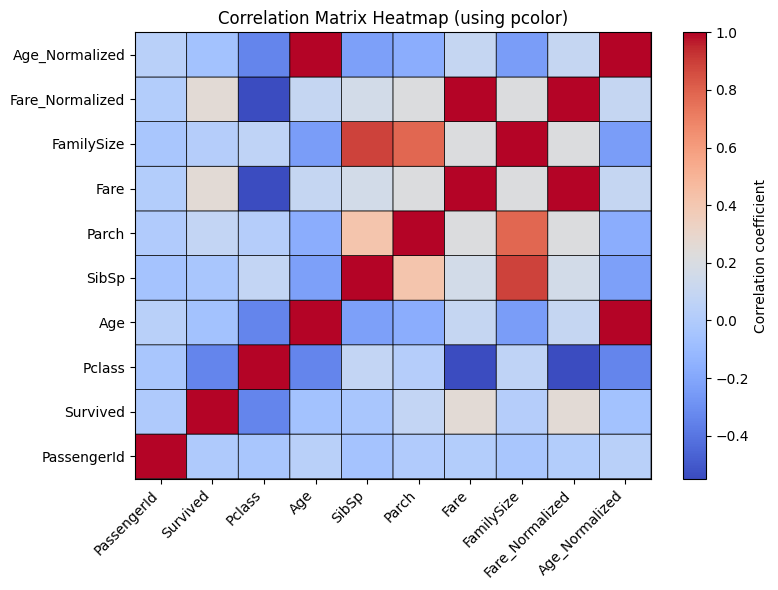

In [43]:
import matplotlib.pyplot as plt
import numpy as np
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolor(corr_matrix, cmap='coolwarm', edgecolors='k', linewidths=0.5)

ax.set_xticks(np.arange(0.5, len(corr_matrix.columns), 1))
ax.set_yticks(np.arange(0.5, len(corr_matrix.columns), 1))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.columns)

fig.colorbar(c, ax=ax, label='Correlation coefficient')
plt.title('Correlation Matrix Heatmap (using pcolor)')
plt.tight_layout()
plt.show()




In [44]:
X = df.drop(columns=['Survived'])  
y = df['Survived']                 
df.to_csv('titanic_cleaned.csv', index=False)
